In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
class plt_reader():
    
    def __init__(self, path, tipo="Organon"):
        
        self.path = path
        self.tipo = tipo
        
        if self.tipo == "Organon":
            self.rows = 5
            
        if self.tipo == "Anatem":
            self.rows = 6
        
    def get_data(self):
        
        with open(self.path) as f:
            self.lines = f.readlines()
            
        self.var_num = int(self.lines[0].strip())
        self.var_num = int(self.var_num)

        print("Numero de variaveis: ", self.var_num)

        self.resto = self.var_num % self.rows
        print("Variaveis na ultima: ", self.resto)

        if self.resto > 0:
            self.num_linhas = int(self.var_num / self.rows) + 1
        else:
            self.num_linhas = int(self.var_num / self.rows)

        print("Numero de linhas:    ", self.num_linhas)

        self.doc_size = int((len(self.lines) - 1 - self.var_num)/self.num_linhas)
        print("Tamanho do documento:", self.doc_size)

        self.variaveis = np.zeros((self.var_num, self.doc_size))
        print("Matriz de variaveis: ", self.variaveis.shape)
        
    def get_values(self):
        
        linha = 1
        cont = 0
        for i in range(self.var_num + 1, len(self.lines)):

            temporaria = self.lines[i].split()

            for e in range(len(temporaria)):
                self.variaveis[e + ((linha - 1)*self.rows), cont] = float(temporaria[e])



            if linha == self.num_linhas:
                linha = 1
                cont += 1
            else:
                linha += 1
        
    def get_names(self):
        
        self.var_dic = {}

        for i in range(1, self.var_num + 1):    
            self.var_dic[self.lines[i].rstrip()] = self.variaveis[i-1]

        # print(self.var_dic.keys())
        

In [3]:
# C:\Users\Scarlet\Desktop\PSSE - Copie
organon = plt_reader('C:\\Users\\Scarlet\\Desktop\\bus68\\LT-SEM-37_52.plt')
organon.get_data()
organon.get_values()
organon.get_names()

Numero de variaveis:  69
Variaveis na ultima:  4
Numero de linhas:     14
Tamanho do documento: 171
Matriz de variaveis:  (69, 171)


In [4]:
# C:\Users\Scarlet\Desktop\PSSE - Copie
organon2 = plt_reader('C:\\Users\\Scarlet\\Desktop\\bus68\\LT-SEM-37_52_101.plt')
organon2.get_data()
organon2.get_values()
organon2.get_names()

Numero de variaveis:  69
Variaveis na ultima:  4
Numero de linhas:     14
Tamanho do documento: 341
Matriz de variaveis:  (69, 341)


In [ ]:
fig = plt.figure(figsize=(25,15))

for i in range(2,70):
    plt.plot(organon2.var_dic['Tempo - segundos'], organon2.var_dic[organon2.lines[i].rstrip()])
    plt.title("Abertura de Circuito (Barras 36 e 61)", fontsize=35)
    plt.xlabel("Tempo [s]", fontsize=30)
    plt.ylabel("Frequência [Hz]", fontsize=30)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True)
    
plt.savefig('C:\\Users\\Scarlet\\Desktop\\LT.png')

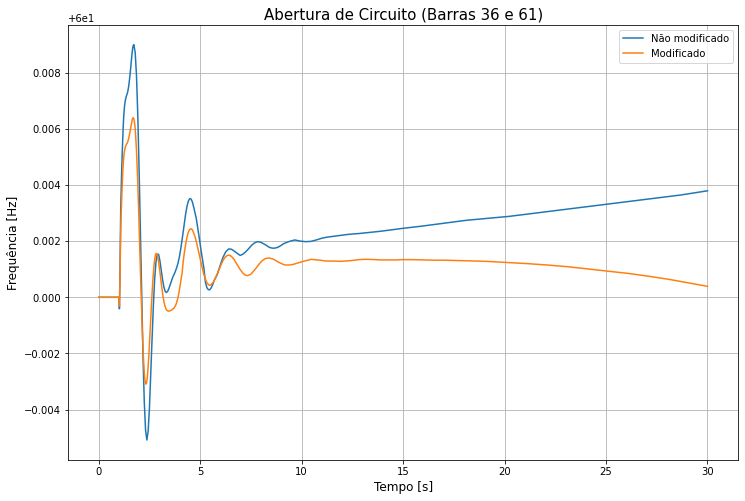

In [12]:
fig = plt.figure(figsize=(12,8))

i = 10

plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[i].rstrip()], label="Não modificado")
plt.plot(organon2.var_dic['Tempo - segundos'], organon2.var_dic[organon2.lines[i].rstrip()], label="Modificado")
plt.title("Abertura de Circuito (Barras 36 e 61)", fontsize=15)
plt.xlabel("Tempo [s]", fontsize=12)
plt.ylabel("Frequência [Hz]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
    
plt.savefig('C:\\Users\\Scarlet\\Desktop\\LT.png')

In [ ]:
# IEEE68bus_ABCI3768_stp001_32s
# IEEE68bus_APCB37_stp001_32s
# IEEE68bus_APCB43_stp001_32s
# IEEE68bus_RMGR03_stp001_32s
# IEEE68bus_RMGR10_stp001_32s

anatem = plt_reader(path='C:\\Users\\Scarlet\\Desktop\\Organon\\PLT_REFs (1)\\PLT_REFs\\IEEE68bus_ABCI3768_stp001_32s.PLT', tipo="Anatem")
anatem.get_data()
anatem.get_values()
anatem.get_names()

In [ ]:
anatem.var_dic.keys()

In [ ]:
anatem.var_dic[anatem.lines[62].rstrip()]

In [ ]:
plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[2].rstrip()])
plt.title(organon.lines[2].rstrip())
plt.grid(True)
plt.show()

In [ ]:
Xl, Yl = [], []

for x in range(len(anatem.var_dic[anatem.lines[2].rstrip()])):
    Xl.append(x+1)
    Yl.append(1.04595)

In [ ]:
c = anatem.var_dic[anatem.lines[2].rstrip()]
len(c)

In [ ]:
plt.plot(anatem.var_dic['Tempo - segundos'], anatem.var_dic[anatem.lines[2].rstrip()])
plt.title(anatem.lines[2].rstrip())
# plt.ylim([1.04, 1.05])
plt.grid(True)
plt.show()    

In [ ]:
print(len(anatem.var_dic[anatem.lines[2].rstrip()]))

In [ ]:
barra = 1
valor = barra + 1

plt.plot(anatem.var_dic['Tempo - segundos'], anatem.var_dic[anatem.lines[valor].rstrip()], label="Anatem")
plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[valor].rstrip()], label="Organon")
plt.title(organon.lines[valor].rstrip())
plt.xlim([0, 30])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pp = PdfPages('C:\\Users\\Scarlet\\Desktop\\CC.pdf')

for i in range(2,274):

    fig = plt.figure()
    
    # plt.ion()
    # plt.plot(anatem.var_dic['Tempo - segundos'], anatem.var_dic[anatem.lines[i].rstrip()], label="Anatem")
    plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[i].rstrip()], label="Organon")
    plt.title(organon.lines[i].rstrip())
    plt.legend()
    plt.grid(True)
    plt.close()
    # plt.show(False)
    
    pp.savefig(fig)
    
pp.close()

In [ ]:
np.savetxt(path + ".csv", variaveis, delimiter=",")

In [31]:
organon = plt_reader('C:\\Users\\Scarlet\\Desktop\\CC-500-100 1.plt')
organon.get_data()
organon.get_values()
organon.get_names()

Numero de variaveis:  69
Variaveis na ultima:  4
Numero de linhas:     14
Tamanho do documento: 172
Matriz de variaveis:  (69, 172)


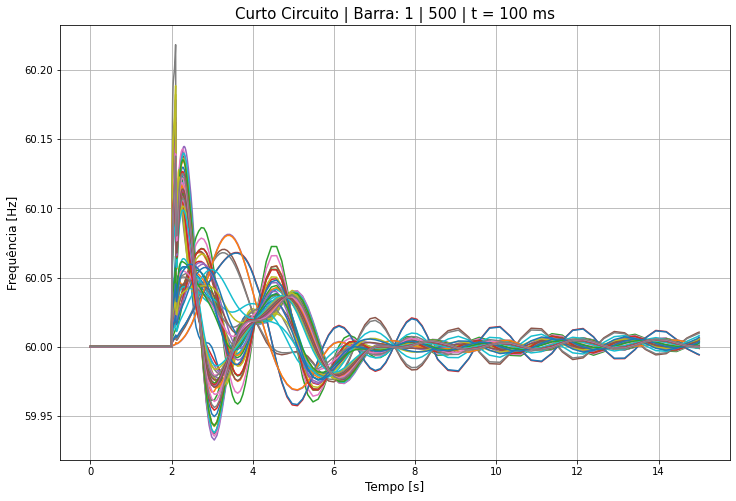

In [32]:
fig = plt.figure(figsize=(12,8))

for i in range(2,70):

    plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[i].rstrip()])
    plt.title("Curto Circuito | Barra: 1 | 500 | t = 100 ms", fontsize=15)
    plt.xlabel("Tempo [s]", fontsize=12)
    plt.ylabel("Frequência [Hz]", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

In [69]:
organon.var_dic[organon.lines[70].rstrip()]

KeyError: '  0.0000000E+00   60.00000       60.00000       60.00000       60.00000'

In [70]:
j = []
for i in range(1, 70):
    j.append(organon.var_dic[organon.lines[i].rstrip()])

In [71]:
np.savetxt("C:\\Users\\Scarlet\\Desktop\\CC-500-100 1.csv", j, delimiter=",")

In [72]:
data = np.genfromtxt('C:\\Users\\Scarlet\\Desktop\\CC-500-100 1.csv', delimiter=',')

In [73]:
len(data)

69

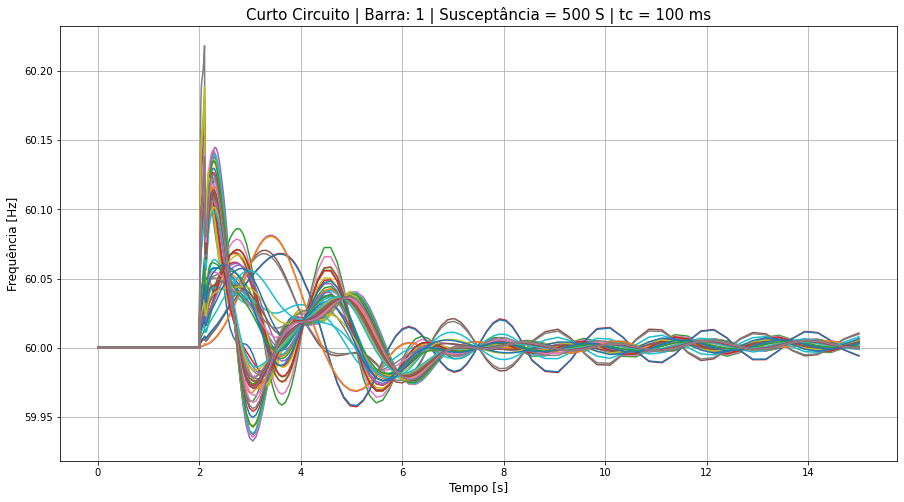

In [77]:
fig = plt.figure(figsize=(15,8))

for i in range(1,69):

    plt.plot(data[0], data[i])
    plt.title("Curto Circuito | Barra: 1 | Susceptância = 500 S | tc = 100 ms", fontsize=15)
    plt.xlabel("Tempo [s]", fontsize=12)
    plt.ylabel("Frequência [Hz]", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

In [63]:
for i in data:
    print(len(i))

172
172
172


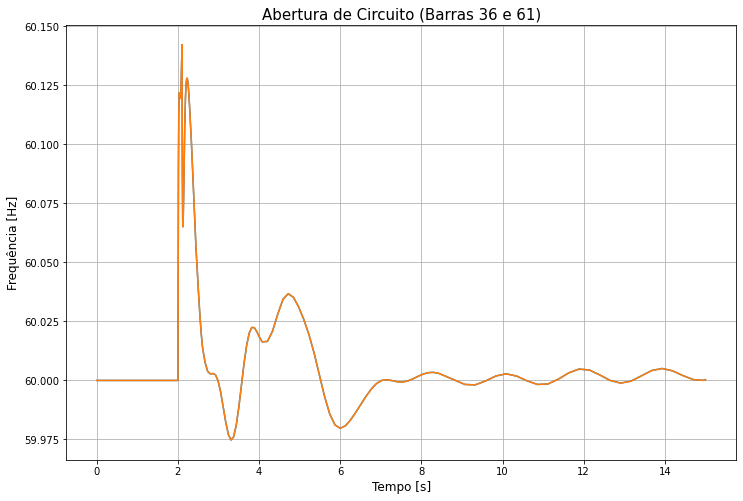

In [60]:
fig = plt.figure(figsize=(12,8))

plt.plot(organon.var_dic['Tempo - segundos'], organon.var_dic[organon.lines[2].rstrip()])
plt.plot(organon.var_dic['Tempo - segundos'], data[0])
plt.title("Abertura de Circuito (Barras 36 e 61)", fontsize=15)
plt.xlabel("Tempo [s]", fontsize=12)
plt.ylabel("Frequência [Hz]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
    
plt.savefig('C:\\Users\\Scarlet\\Desktop\\LT.png')